In [1]:
import torch
import copy
import matplotlib.pyplot as plt

## Training an MLP


The previous linear regression example was kind of a joke. Let us get (slightly) more serious!




Dataset creation

In [2]:
nx = 1 # single input
ny = 1 # single output
a = -1 # lower limit x
b = 1 # higher limit x
n_samples = 100 # data point
sigma_e = 0.1 # noise std
lr = 1e-3 # learning rage

In [3]:
# Function definition
def f(x):
    return 2*torch.sin(3*x)  - 3*torch.cos(7*x)

In [4]:
# Generate synthetic data
x_train = a + torch.rand((n_samples, 1))*(b - a)
y_train = f(x_train) + sigma_e * torch.randn(n_samples, 1)
y_train = y_train.view(-1, 1)
x_train.shape, y_train.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

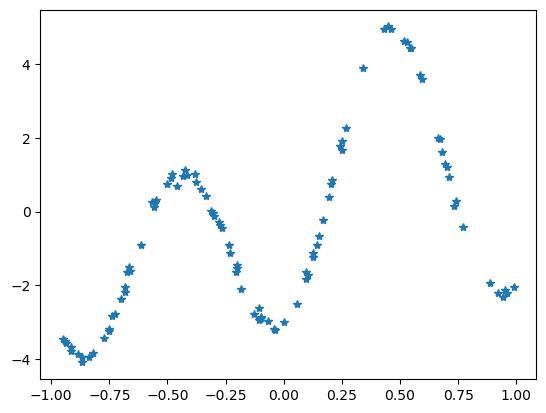

In [5]:
plt.plot(x_train, y_train, "*");

### Model

We model the data with a MLP with one hidden layer with 16 hidden nodes:
\begin{gather}
f: \mathbb{R} \rightarrow \mathbb{R} := W_2 \tanh (W_1 x + b_1) + b_2 \\
\end{gather}

with 
\begin{equation}
W_1 \in \mathbb{R}^{16 \times 1}, b_1 \in \mathbb{R}^{16}, W_2 \in \mathbb{R}^{1 \times 16}, b_2 \in \mathbb{R}^{1}
\end{equation}

In [6]:
n_hidden = 16
params_init = {
    "W1": torch.randn(n_hidden, nx, requires_grad=True),
    "b1": torch.randn(n_hidden, requires_grad=True),
    "W2": torch.randn(ny, n_hidden, requires_grad=True),
    "b2": torch.randn(ny, requires_grad=True)
}

def nn(params, x):
    z = torch.tanh(params["W1"] @ x + params["b1"])
    y = params["W2"] @ z + params["b2"]
    return y

In [7]:
# The nn function above works for a single input x, but cannot handle a "batch"
nn(params_init, x_train[0]) 

tensor([3.0464], grad_fn=<AddBackward0>)

In [8]:
# We can "vectorize" the nn function with linear algebra and broadcasting tricks
def batched_nn(params, x):
    z = torch.tanh(x @ params["W1"].T + params["b1"])
    y = z @ params["W2"].T + params["b2"]
    return y

In [9]:
batched_nn(params_init, x_train).shape

torch.Size([100, 1])

In [10]:
# Alternative: the recently introduced vmap functional transfor simplifies vectorization a lot!
# batched_nn = torch.func.vmap(nn, in_dims=(None, 0)) # vectorize with respect to the second argument only

### Visualize the MLP model  at initialization together with the data points

### Train the MLP  by minimizing the MSE loss on the training dataset with gradient descent

Hint: 
* Adapt the last training loop in pytorch_bare_slides.ipynb
* You can use ``torch.autograd.grad`` to compute the gradients. The second argument can be a list of variables, you get back a list of derivatives
* Alternatively, you can call ``loss.backward``. After the call to backward, each parameter `p` will have a `p.grad` field containing the gradient. Free the .grad field after usage with `p.grad.zero_()`, otherwise, gradients are accumulated over iterations!

### Visualize the training loss


### Visualize the trained MLP model  and the data points

### Bonus

Can you compute the loss derivatives analytically and/or  verify some of them numerically (eg, by finite differences)?